
# Проект: Исследование стартапов
- Автор: Заславский Данила
- Дата: 23.04.2025

## Введение


**Цель проекта:** подготовить объединённый датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы финансовой компании как о предобработке, так и о значении данных для разработки модели бизнеса.

**Задачи:** 
1. Загрузить данные и ознакомиться с их содержимым
2. Провести предбоработку данных, совершить предварительное исследование
3. Провести исследовательский анализ данных:
    - изучить, по каким столбцам следует объединить данные из разных таблиц;
    - исследовать, можно ли доверять данным о сотрудниках стартапов и их образовании;
    - исследовать компании, которые были куплены за 0 или 1 доллар;
    - выделить категории стартапов с типично высокими ценами и наибольшим разбросом цен за стартап;
    - Исследовать типичное значение количества раундов для каждого возможного статуса стартапа
4. Сформулировать выводы по проведенному анализу    

### Описание данных

Данные состоят из пяти датасетов:

- `company_and_rounds.csv` - cодержит информацию о компаниях и раундах финансирования;
- `acquisition.csv` - cодержит информацию о покупках одними компаниями других компаний;
- `people.csv` - cодержит информацию о сотрудниках;
- `education.csv` - cодержит информацию об образовании сотрудника;
- `degrees.csv` - cодержит информацию о типе образования сотрудника.

**Описание датасета `company_and_rounds`:**

- `company ID` — идентификатор компании.
- `name` — название компании.
- `category code` — категория области деятельности компании.
- `status` — статус компании.
- `founded at` — дата инвестирования.
- `closed at` — дата закрытия компании.
- `domain` — официальный сайт компании.
- `network username` — ник компании в сети.
- `country code` — код страны компании.
- `investment rounds` — число инвестиционных раундов.
- `funding rounds` — число раундов финансирования.
- `funding total` — сумма финансирования.
- `milestones` — вехи финансирования.
- `funding round id` — идентификатор этапа финансирования.
- `company id` — идентификатор компании.
- `funded at` — дата финансирования.
- `funding round type` — тип финансирования.
- `raised amount` — сумма финансирования.
- `pre money valuation` — предварительная денежная оценка.
- `participants` — число участников.
- `is first round` — является ли раунд первым.
- `is last round` — является раунд последним.

**Описание датасета `acquisition`:**

- `id` — идентификатор покупки.
- `acquiring_company_id` — идентификатор покупающей компании.
- `acquired_company_id` — идентификатор покупаемой компании.
- `term_code` — варианты расчёта.
- `price_amount` — сумма сделки.
- `acquired_at` — дата сделки.

**Описание датасета `people`:**

- `id` — идентификатор сотрудника.
- `first_name` — имя сотрудника.
- `last_name` — фамилия сотрудника.
- `company_id` — идентификатор компании.
- `network_username` — ник в социальных сетях.

**Описание датасета `education`:**

- `id` - идентификатор записи об образовании.
- `person_id` — идентификатор работника.
- `instituition` — название учебного заведения.
- `graduated_at` — дата получения образования.

**Описание датасета `degrees`:**

- `id` — идентификатор записи.
- `object_id` — идентификатор сотрудника.
- `degree_type` — тип образования.
- `subject` — специальность.


### Содержимое проекта

[1. Знакомство с данными: загрузка и первичная предобработка](#chapter1)    
[2. Предобработка данных, предварительное исследование](#chapter2)    
[3. Исследовательский анализ объединённых таблиц](#chapter3)    
[4. Итоговый вывод и рекомендации](#chapter4)


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка
<a id='chapter1'></a>

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* people.csv
* education.csv
* degrees.csv

Опциональные датасеты:
* fund.csv
* investment.csv


Они находятся в папке datasets, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

### 1.1. Вывод общей информации, исправление названия столбцов



Начнём с загрузки библиотек и датасетов. Будем использовать `pandas` и библиотеки визуализации данных `matplotlib` и `seaborn`.

In [2]:
# Импортируем библиотеку pandas
import pandas as pd

#Импортируем библиотеку numpy
import numpy as np

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Выгружаем данные исходных датасетов
company_and_rounds = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
acquisition = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
people = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')
education = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
degrees =  pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')

Познакомимся с данными датасетов. Начнём с `company_and_rounds`. Выведем первые строки методом `head()`, а информацию о датафрейме методом info():

In [6]:
#выводим первые строки датафрейма на экран
company_and_rounds.head(26)

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaN,mywebbo.com,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10002.0,Synergie Media,advertising,operating,2007-06-27,NaN,synergie-media.com,NaN,MAR,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10003.0,Green Basti Ecosystems,cleantech,operating,2008-08-20,NaN,NaN,NaN,IND,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100042.0,HostNine,NaN,operating,NaN,NaN,hostnine.com,Hostnine,NaN,0.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Выводим информацию о датафрейме
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

Датасет `company_and_rounds` содержит 22 столбца и 217472 строки, в которым предсатавлена информация о компаниях и раундах финансирования.

После первичного анализа можно сделать выводы:
- названия столбцов отражают содержимое столбцов, но их необходимо привести к стилю snake case;
- 10 столбцов представлены типом object. Это `name`, `category  code`, `status`, `founded  at`, `closed  at`,  `domain`, `network  username`, `country  code`, `funded  at`, `funding  round  type`. Столбцы `founded  at`, `closed  at` и  `funded  at` содержат информацию о дате, рекомендуется использовать тип `datetime64`; 
- 12 столбцов представлены типов float64: `company  ID`, `investment  rounds`, `funding  rounds`, `funding  total`, `milestones`,  `funding  round  id` `company  id`, `raised  amount`, `pre  money  valuation`, `participants`, `is  first  round`, `is  last  round`. 
Столбцы `company  ID`, `investment  rounds`, `funding  rounds`,  `funding  round  id`,  `pre  money  valuation`, `participants` содержат целочисленные значения, рекомендуется привести к Int64. 
Столбцы `is  first  round` и `is  last  round` содержат булевы значения, рекомендуется использовать тип `bool`.
- столбец `company  id` стоит переименовать, так как при приведении к одному формату его наименование будет дублироваться с  `company  ID`.

Теперь рассмотрим данные датасета `acquisition`:

In [5]:
#выводим первые строки датафрейма на экран
acquisition.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [6]:
#Выводим информацию о датафрейме
acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


Датасет `acquisition` содержит 6 столбцов и 9407 строк, которые содержат информацию о покупках одними компаниями других компаний. После первичного анализа можно сделать выводы:
- названия столбцов приведены к одному виду и отражают содержимое столбцов;
- 4 столбца (`id`, `acquiring_company_id`, `acquired_company_id`, `price_amount`) имеют тип int64. Тип данных соответсвует содержимому столбцов;
- столбец `term_code` имеет тип `object`, рекомендуется привести к типу `category`, столбец `acquired_at`, также имеющий тип `object`, рекомендуется привести к типу `datetime64`. 

Далее рассмотрим датасет `people`:

In [7]:
#выводим первые строки датафрейма на экран
people.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [8]:
#Выводим информацию о датафрейме
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


Датасет `people` содержит 5 строк и 226709 строк, в которых содержится информация о сотрудниках. После первичного анализа можно сделать выводы:
- названия столбцов приведены к одному виду и отражают содержимое столбцов;
- столбец `company_id`, имеющий тип `float64`, стоит привести к типу `int64`.


Далее рассмотрим датасет `education`:

In [9]:
#выводим первые строки датафрейма на экран
education.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [10]:
#Выводим информацию о датафрейме
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


Датафрейм содержит 4 столба и 109610 строк об образовании сотрудников. После первичного анализа можно сделать выводы:
- названия столбцов приведены к одному виду и отражают содержимое столбцов;
- столбец `graduated_at`, относящийся к типу object и содержащий дату получения образования, стоит привести к типу datetime64.

Теперь рассмотрим данные датасета `degrees`:

In [11]:
#выводим первые строки датафрейма на экран
degrees.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [12]:
degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


Датафрейм содержит 4 строки и 109610 строк о типе образования сотрудника. осле первичного анализа можно сделать выводы:
- названия столбцов приведены к одному виду и отражают содержимое столбцов;
- данные столбца `object_id` следует отредактировать: оставить только числовой номер и привести к типу int64.

### 1.2. Смена типов и анализ пропусков

- Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.
- Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

Преобразуем столбцы, содержащие даты, к типу данных datetime:

In [13]:
# Преобразование типа данных в датафрейме 'company_and_rounds'
date_cols_company = ['founded  at', 'closed  at', 'funded  at']
for col in date_cols_company:
    company_and_rounds[col] = pd.to_datetime(company_and_rounds[col], errors='coerce')

#проверяем преобразование  
company_and_rounds.dtypes

company  ID                     float64
name                             object
category  code                   object
status                           object
founded  at              datetime64[ns]
closed  at               datetime64[ns]
domain                           object
network  username                object
country  code                    object
investment  rounds              float64
funding  rounds                 float64
funding  total                  float64
milestones                      float64
funding  round  id              float64
company  id                     float64
funded  at               datetime64[ns]
funding  round  type             object
raised  amount                  float64
pre  money  valuation           float64
participants                    float64
is  first  round                float64
is  last  round                 float64
dtype: object

In [14]:
# Преобразование типа данных в датафрейме 'acquisition'
acquisition['acquired_at'] = pd.to_datetime(acquisition['acquired_at'], errors='coerce')
acquisition.dtypes

id                               int64
acquiring_company_id             int64
acquired_company_id              int64
term_code                       object
price_amount                     int64
acquired_at             datetime64[ns]
dtype: object

In [15]:
# Преобразование типа данных в датафрейме 'education'
education['graduated_at'] = pd.to_datetime(education['graduated_at'], errors='coerce')
education.dtypes

id                       int64
person_id                int64
instituition            object
graduated_at    datetime64[ns]
dtype: object

В столбцах, которые содержатся информация о датах, тип данных успешно изменился с `object` на `datetime64`. Далее оценим полноты данных:

In [16]:
#функция для анализа пропусков в датафрейме
def missing(dataset):
   
    result = pd.DataFrame({
        'Кол-во пропусков': dataset.isnull().sum(),
        'Доля пропусков': dataset.isnull().mean().round(4)
    })
    
    return result.style.background_gradient(cmap='coolwarm')

#анализ пропусков для датафрейма company_and_rounds
missing(company_and_rounds)

,Кол-во пропусков,Доля пропусков
company ID,302,0.001400
name,302,0.001400
category code,73888,0.339300
status,302,0.001400
founded at,107818,0.495100
closed at,214325,0.984200
domain,70615,0.324300
network username,122240,0.561300
country code,109167,0.501300
investment rounds,302,0.001400


In [17]:
#анализ пропусков для датафрейма acquisition
missing(acquisition)

,Кол-во пропусков,Доля пропусков
id,0,0.000000
acquiring_company_id,0,0.000000
acquired_company_id,0,0.000000
term_code,7576,0.805400
price_amount,0,0.000000
acquired_at,29,0.003100


In [18]:
#анализ пропусков для датафрейма people
missing(people)

,Кол-во пропусков,Доля пропусков
id,0,0.000000
first_name,5,0.000000
last_name,1,0.000000
company_id,192094,0.847300
network_username,187842,0.828600


In [19]:
#анализ пропусков для датафрейма education
missing(education)

,Кол-во пропусков,Доля пропусков
id,0,0.000000
person_id,0,0.000000
instituition,55,0.000500
graduated_at,51556,0.470400


In [20]:
#анализ пропусков для датафрейма degrees
missing(degrees)

,Кол-во пропусков,Доля пропусков
id,0,0.000000
object_id,0,0.000000
degree_type,11218,0.102300
subject,28312,0.258300


### Промежуточный вывод

На основе проведённого анализа структуры данных и пропусков можно сделать вывод, что в данных есть информация о 217 тыс. компаний с указанием их статуса (operating, acquired, closed), присутсвуют данные о раундах финансирования, имеется 9,4 тыс. записей о покупках с указанием цены (`price_amount`). 

Проблемными местами являются 75% пропусков в данных о сумме привлеченных инвестиций (`raised_amount`), что усложнит анализ зависимости успеха компании от объема инвестиций. Также к проблемам можно отнести 85% отсутсвие данных о компании у сотрудников, ~50% пропусков в данных об образовании, из-за чего Исследование влияния команды/образования на успех стартапа может быть ограничено. В столбце `acquisition` у 80% записей отсутствуют данные о форме расчёта. 

Таким образом, данных достаточно для решения большинства задач проекта, однако высокое количество пропусков в необходимых для анализа столбцах может сильно уменьшить выборку и снизит репрезентативность.



## Шаг 2. Предобработка данных, предварительное исследование

<a id='chapter2'></a>


### 2.1. Раунды финансирования по годам



Составим сводную таблицу по годам на основании столбца `raised_amount`, в которой есть иноформация о более чем 50 раундах финансирования за год:

In [21]:
# извлекаем год из даты
company_and_rounds['funded_at_year'] = company_and_rounds['funded  at'].dt.year

#создаём свобдную таблицу
pivot_amount = pd.pivot_table(
    data = company_and_rounds.dropna(subset = ['raised  amount', 'funded_at_year']),
    index = 'funded_at_year',
    values = 'raised  amount',
    aggfunc = ['median', 'count']
)

# Переименовываем столбцы для удобства
pivot_amount.columns = ['typical_funding', 'rounds_count']
#фильтруем таблицу по количеству раундов
pivot_amount = pivot_amount[pivot_amount['rounds_count'] > 50]
print(pivot_amount)

                typical_funding  rounds_count
funded_at_year                               
1999.0                2000000.0            76
2000.0                4200000.0           125
2001.0                3000000.0            96
2002.0                4200000.0           116
2003.0                3000000.0           159
2004.0                5000000.0           291
2005.0                5500000.0          1633
2006.0                5000000.0          2436
2007.0                3973320.0          3279
2008.0                3110000.0          3774
2009.0                2000000.0          4151
2010.0                1602500.0          6221
2011.0                1200000.0          9204
2012.0                1000000.0          9970
2013.0                1200000.0         11072


Построим график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования:

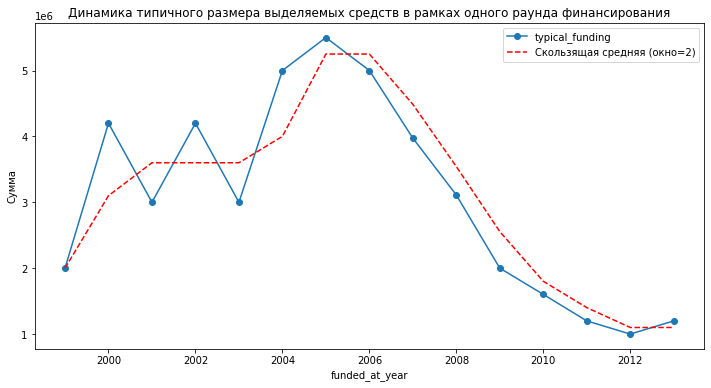

In [22]:
#строим график
plt.figure(figsize=(12, 6))
pivot_amount['typical_funding'].plot(
    kind='line',
    marker='o',
    title='Динамика типичного размера выделяемых средств в рамках одного раунда финансирования',
    xlabel='Год',
    ylabel='Сумма',
    grid=True
)
pivot_amount['typical_funding'].rolling(window=2, min_periods=1).mean().plot(
    color='red',
    linestyle='--',
    label='Скользящая средняя (окно=2)'
)

plt.legend()
plt.show()

Исходя из результатов анализа, можно сделать вывод, что типичный размер собранных в рамках одного раунда средств был максимален в **2005** году и составлял 550000.

В 2013 году количество раундов и размер средств **увеличился** в сравнении с 2012 годом и составлял 11072 и 120000 соответственно.


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.


In [23]:
#объединим датасеты people и education
people_education = pd.merge(
    people, 
    education,
    left_on = 'id',
    right_on = 'person_id',
    how = 'left'
)

#подсчет количества сотрудников по компаниям
company_size = people_education.groupby('company_id')['id_x'].count().reset_index()
company_size.columns = ['company_id', 'employee_count']

#разделение на группы
bins = [0, 10, 50, 200, np.inf]
labels = ['1-10', '11-50', '51-200', '201+']
company_size['size_group'] = pd.cut(company_size['employee_count'], 
                                   bins=bins, 
                                   labels=labels)
people_education = pd.merge(people_education, company_size, on='company_id', how='left')

# Расчет доли сотрудников без данных об образовании

#создаем столбец с отметкой о наличии образования
people_education['has_education'] = people_education['instituition'].notna()

#группируем по размеру компании и считаем среднее
education_coverage = people_education.groupby('size_group')['has_education'].mean()

#переводим в проценты пропусков
missing_education = (1 - education_coverage) * 100

#cчитаем количество компаний в каждой группе
company_counts = company_size['size_group'].value_counts().sort_index()


result = pd.DataFrame({
    'Количество компаний': company_counts,
    'Доля без образования (%)': missing_education.round(1),
})

print(result)

        Количество компаний  Доля без образования (%)
1-10                  22692                      37.6
11-50                   216                      27.7
51-200                   12                      17.8
201+                      2                      19.4


Мы получили распределение количества компаний и долю сотрудников без информации об образовании по выбранным категориям. Категории были выбраны следующим образом:
- 1-10 сотрудников: стартап
- 11-50 сотрудников: малая компания
- 51-200 сотрудников: средняя компания
- 201+ сотрудников: крупная компания

Для выполнения задания присоединить к этим таблицам таблицу degrees.csv возможно, для этого в столбце 'object_id' нужно с помощью метода `replace('p:', '')` привести столбцы для объединения к одному формату. Однако это может усложнить анализ и уменьшит долю полных записей

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

In [24]:
#проверка наличия столбца в датафреймах
print('company_and_rounds:', 'network  username' in company_and_rounds.columns)
print('acquisition:', 'network_username' in acquisition.columns)
print('people:', 'network_username' in people.columns)
print('education:', 'network_username' in education.columns)
print('degrees:', 'network_username' in degrees.columns)

company_and_rounds: True
acquisition: False
people: True
education: False
degrees: False


Стобец `network_username` есть в датафрейме `company_and_rounds` и `people`. Проведём анализ заполнености и уникальности:

In [25]:
#для датафрейма company_and_rounds
company_usernames = company_and_rounds['network  username'].dropna()
print('\nВ датафрейме "company_and_rounds":')
print(f'Заполнено: {len(company_usernames)}/{len(company_and_rounds)} {len(company_usernames)/len(company_and_rounds):.1%}')
print(f'Уникальных: {company_usernames.nunique()}')

#для датафрейма people
people_usernames = people['network_username'].dropna()
print('\nВ датафрейме "people":')
print(f'Заполнено: {len(people_usernames)}/{len(people)} {len(people_usernames)/len(people):.1%}')
print(f'Уникальных: {people_usernames.nunique()}')

# С помощью пересеченья найдём совпадения
common = set(company_usernames) & set(people_usernames)
print(f'\nОбщих network_username: {len(common)}')


В датафрейме "company_and_rounds":
Заполнено: 95534/217774 43.9%
Уникальных: 79571

В датафрейме "people":
Заполнено: 38867/226709 17.1%
Уникальных: 38421

Общих network_username: 2199


Датафреймы имеют низкую заполненость в столбце `network_username`. Также наиболее вероятно, что они содержат данные разной природы - в `company_and_rounds` относящиеся к компании, а в `people` - к сотруднику. Низкое количетство общих элементов пересечения подверждает это. Использовать столбец `network_username` для объединения данных **не рекомендуется**.


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Любым удобным способом приведите данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

Разделим исходный датасет на 2 отдельных датасета `companies` и `rounds`, чтобы устранить дублирование атрибутов компании и уменьшить объём данных:

In [26]:
#выделяем общую информацию о компаниях
companies = company_and_rounds.drop_duplicates('company  ID')[[
    'company  ID', 'name', 'category  code', 'status', 
    'founded  at', 'closed  at', 'domain', 'network  username',
    'country  code', 'investment  rounds', 'funding  rounds', 
    'funding  total', 'milestones'
]].reset_index(drop=True)

#выделяем информацию о раундах финансирования
rounds = company_and_rounds[[
    'funding  round  id', 'company  id', 'funded  at', 
    'funding  round  type', 'raised  amount', 'pre  money  valuation',
    'participants', 'is  first  round', 'is  last  round'
]].dropna(subset=['funding  round  id']).reset_index(drop=True)

In [27]:
#проверяем получившиеся датасеты
print(companies.info())
print(rounds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196554 entries, 0 to 196553
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   company  ID         196553 non-null  float64       
 1   name                196553 non-null  object        
 2   category  code      123186 non-null  object        
 3   status              196553 non-null  object        
 4   founded  at         91227 non-null   datetime64[ns]
 5   closed  at          2620 non-null    datetime64[ns]
 6   domain              126545 non-null  object        
 7   network  username   80591 non-null   object        
 8   country  code       87990 non-null   object        
 9   investment  rounds  196553 non-null  float64       
 10  funding  rounds     196553 non-null  float64       
 11  funding  total      196553 non-null  float64       
 12  milestones          196553 non-null  float64       
dtypes: datetime64[ns](2), float64

Мы успешно разбили исходный датасет на 2 разных: `companies` и `rounds`.Теперь стало удобно отобирать компании по параметрам и рассчитать показатели из расчёта на одну компанию.


## Шаг 3. Исследовательский анализ объединённых таблиц


<a id='chapter3'></a>



### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверьте полноту и корректность получившейся таблицы. Далее работайте только с этими данными.

In [28]:
#фильтруем компании по вышеперечисленным условиям
filtered_companies = companies[
    (companies['funding  rounds'] > 0) |
    (companies['investment  rounds'] > 0) |
    (companies['status'] == 'acquired')
]

#объединяем датафреймы с отфильтрованными компаниями и с инофрмацией о покупках одних компаний другими
df = pd.merge(
    filtered_companies,
    acquisition,
    left_on='company  ID',
    right_on='acquired_company_id',
    how='left'
)

#проверяем результат
df.head()




,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,funding rounds,funding total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,NaN,NaN,NaN,NaN,NaN,NaT
1,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,1.0,11.0,10.0,NaN,20000000.0,2007-05-30
2,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0,20.0,377.0,100.0,cash,0.0,2005-05-29
3,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0,1901.0,5.0,1001.0,cash_and_stock,47500000.0,2009-08-10
4,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0,3878.0,23054.0,10014.0,NaN,0.0,2010-09-30


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40890 entries, 0 to 40889
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company  ID           40890 non-null  float64       
 1   name                  40890 non-null  object        
 2   category  code        35436 non-null  object        
 3   status                40890 non-null  object        
 4   founded  at           27911 non-null  datetime64[ns]
 5   closed  at            2128 non-null   datetime64[ns]
 6   domain                35883 non-null  object        
 7   network  username     20938 non-null  object        
 8   country  code         34858 non-null  object        
 9   investment  rounds    40890 non-null  float64       
 10  funding  rounds       40890 non-null  float64       
 11  funding  total        40890 non-null  float64       
 12  milestones            40890 non-null  float64       
 13  id              

Объединение произошло успешно, теперь у нас есть объединённый датасет `df`, содержащий информацию о компании и её участии в покупке/продаже. Как и ожидалось, в таблице получилось порядка 40 тысяч записей.



### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [30]:
#применим метод discribe к столбцу funding total
df['funding  total'].describe()

count    4.089000e+04
mean     1.013559e+07
std      5.641289e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.631320e+06
max      5.700000e+09
Name: funding  total, dtype: float64

Можно предположить, что данные имеют вид правого ассиметричного распределения, так как медиана (600 000) сильно меньше среднего (10 135 590). Распределение имеет крайне большое стандартное отклонение (56 412 890), что свидетельсвует о высоком разбросе данных. 25% перцентиль говорит о том, что четверть компаний имеет нулевое финансирование. Построим гистограмму распределения:

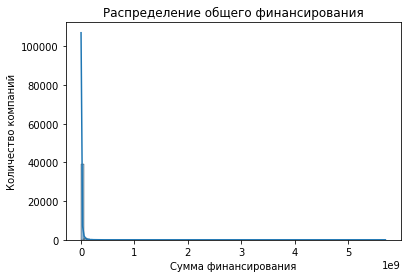

In [31]:
#построим гистограмму с помощью библиотеку seaborn
sns.histplot(
    data = df,
    x = 'funding  total',
    bins = 100,
    kde = True
)

plt.title('Распределение общего финансирования')
plt.xlabel('Сумма финансирования')
plt.ylabel('Количество компаний')
plt.show()

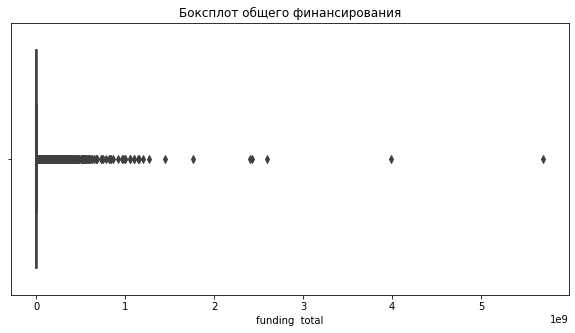

In [32]:
#построение диаграммы с усами 
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df, 
    x='funding  total')
plt.title('Боксплот общего финансирования')
plt.show()

По полученным результатам анализа видно, что выборка имеет крайне высокие выбросы, сильно искажающие результаты. Для фильтрации типичной компании воспользуемся межквартильным размахом IQR:

25-й персентиль равен 0.0
75-й персентиль равен 5631320.0
Межквартильный размах IQR равен 5631320.0


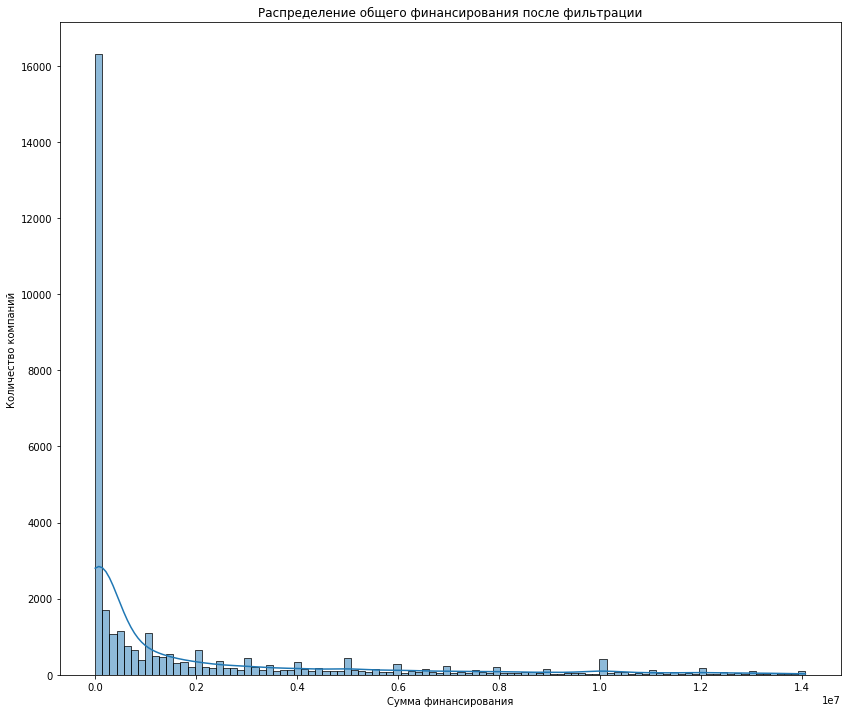

In [33]:
#находим 25 персентиль
q1 = np.percentile(df['funding  total'], 25)
print(f'25-й персентиль равен {q1}')

#находим 75 персентиль
q3 = np.percentile(df['funding  total'], 75)
print(f'75-й персентиль равен {q3}')

#находим межквартильный размах
iqr = q3 - q1
print(f'Межквартильный размах IQR равен {iqr}')

#фильтруем компании 
typical_companies = df[df['funding  total'] <= q3 + 1.5*iqr]

typical_companies['funding  total'].describe()

#построим гистограмму без выбросов

plt.figure(figsize=(14, 12))
sns.histplot(
    data = typical_companies,
    x = 'funding  total',
    bins = 100,
    kde = True
)
plt.title('Распределение общего финансирования после фильтрации')
plt.xlabel('Сумма финансирования')
plt.ylabel('Количество компаний')
plt.show()

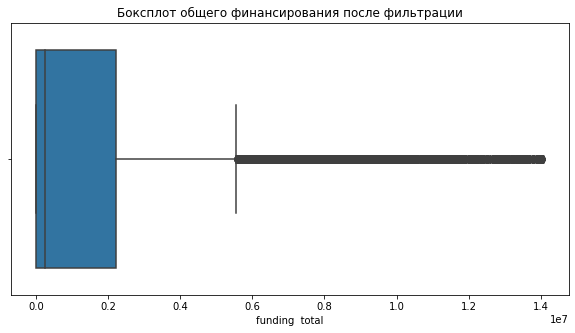

In [34]:
#построение диаграммы с усами 
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=typical_companies, 
    x='funding  total')
plt.title('Боксплот общего финансирования после фильтрации')
plt.show()

In [35]:
 typical_companies['funding  total'].describe()

count    3.500100e+04
mean     1.863263e+06
std      3.137507e+06
min      0.000000e+00
25%      0.000000e+00
50%      2.500000e+05
75%      2.215410e+06
max      1.406980e+07
Name: funding  total, dtype: float64

In [36]:
#сколько компаний имеют значения финансирования выше 14.1 млн
len(df) - len(typical_companies)

5889

Исходя из проведённого выше анализа, можно предположить, что выбивающимися значениями размера общего финансирования для одной компании являются значения выше **14.1 млн**. Также стоит отметить, что 25% компаний име.т нулевое финансирование. После проведения фильтрации типичное среднее значение финансирования составляет 1.85 млн, а более корректное типичное медианное значение финансировния - **250 тыс**. Из 40890 компаний 5889 имеют размер финансирования выше 14.1 млн, что можно отнести к исключительным случаям.


### 3.3. Куплены забесплатно?

- Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют.

In [37]:
#фильтрация необходимых компаний
zero_one_sales = df[
    (df['funding  total'] > 0) &
    (df['price_amount'].isin([0, 1]))
]
print(f'Найдено {len(zero_one_sales)} компаний с "бесплатной" ценой')

Найдено 1618 компаний с "бесплатной" ценой


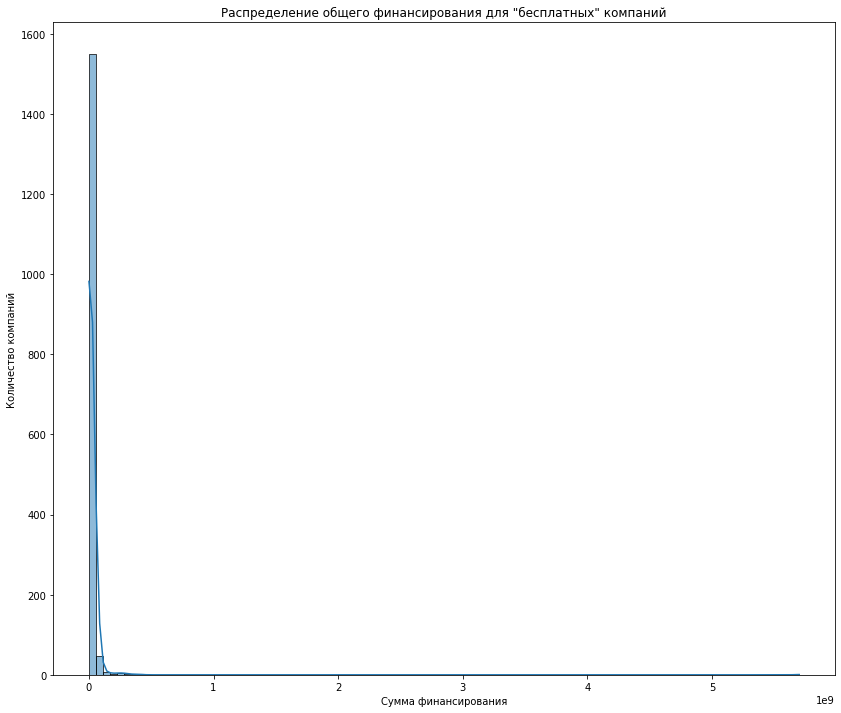

In [38]:
#построим гистограмму для отобранных компаний

plt.figure(figsize=(14, 12))
sns.histplot(
    data = zero_one_sales,
    x = 'funding  total',
    bins = 100,
    kde = True
)
plt.title('Распределение общего финансирования для "бесплатных" компаний')
plt.xlabel('Сумма финансирования')
plt.ylabel('Количество компаний')
plt.show()

Теперь аналитически рассчитаем персентили и верхнюю и нижнюю границу выбросов:

In [39]:
#находим 25 персентиль
q1 = np.percentile(zero_one_sales['funding  total'], 25)
print(f'25-й персентиль равен {q1}')

#находим 75 персентиль
q3 = np.percentile(zero_one_sales['funding  total'], 75)
print(f'75-й персентиль равен {q3}')

#находим межквартильный размах
iqr = q3 - q1
print(f'Межквартильный размах IQR равен {iqr}')

#находим нижнюю границу выбросов
low = max(0, q1 - 1.5*iqr)

#находим верхнюю границу выбросов
up = q3 + 1.5*iqr

# Функция для поиска персентиля
def find_percentile(value, sorted_data):
    count = len(sorted_data[sorted_data <= value])
    return (count / len(sorted_data)) * 100

# Применяем к нашим границам
low_pct = find_percentile(low, zero_one_sales['funding  total'])
up_pct = find_percentile(up, zero_one_sales['funding  total'])

print(f"Нижняя граница выбросов: {low:.2f} cоответствует {low_pct:.1f} персентилю")
print(f"Верхняя граница выбросов: {up:.2f} cоответствует {up_pct:.1f} персентилю")





25-й персентиль равен 2000000.0
75-й персентиль равен 15500000.0
Межквартильный размах IQR равен 13500000.0
Нижняя граница выбросов: 0.00 cоответствует 0.0 персентилю
Верхняя граница выбросов: 35750000.00 cоответствует 90.9 персентилю


После проведения аналитического анализа можно отметить, что среди **1618** компаний, которые были проданы за ноль или за один доллар при ненулевом объёме финансирования, нижней границей выбросов является значение **0**, соответвующее **0 персентилю**, а верхней границей является знаячение **35 750 000**, соответсвующее **90.9 персентилю**. 


### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [52]:
#фильтруем только купленные стартапы
acquired = df[df['status'] == 'acquired']


# Группируем по категориям
grouped = acquired.groupby('category  code')['price_amount']


# Создаем пустой DataFrame для результатов
stats_df = pd.DataFrame()

# Заполняем основными статистическими показателями
stats_df['count'] = grouped.count()  
stats_df['median'] = grouped.median()  
stats_df['mean'] = grouped.mean()  
stats_df['std'] = grouped.std()  

# Расчет IQR через квантили
stats_df['iqr'] = grouped.quantile(0.75) - grouped.quantile(0.25)

top_median = stats_df.sort_values('median', ascending=False).head(10)
top_iqr = stats_df.sort_values('iqr', ascending=False).head()

print("Категории с самыми высокими типичными ценами:")
print(top_median)

Категории с самыми высокими типичными ценами:
                count       median          mean           std           iqr
category  code                                                              
nanotech            1  584000000.0  5.840000e+08           NaN  0.000000e+00
manufacturing      29   72000000.0  5.892724e+08  9.696580e+08  6.150000e+08
real_estate         7   50000000.0  1.256143e+09  2.505123e+09  9.035000e+08
automotive          5   43000000.0  1.528600e+09  2.297758e+09  2.400000e+09
biotech           454   13200000.0  4.263121e+08  1.540374e+09  2.500000e+08
hospitality        11   12500000.0  2.802182e+08  6.514494e+08  1.187500e+08
finance            40     600000.0  3.021988e+08  7.960985e+08  1.707500e+08
news               27          0.0  3.029630e+07  7.096563e+07  2.100000e+07
nonprofit           1          0.0  0.000000e+00           NaN  0.000000e+00
other             315          0.0  1.410059e+08  1.085129e+09  5.750000e+05


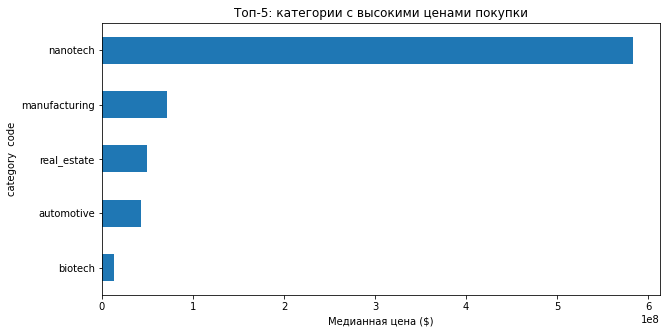

In [41]:
# График топ-5 по медиане
plt.figure(figsize=(10,5))
top_median['median'].sort_values(ascending=True).plot(kind='barh')
plt.title('Топ-5: категории с высокими ценами покупки')
plt.xlabel('Медианная цена ($)')
plt.show()

In [42]:
print("Категории с наибольшим разбросом цен за стартап:")
print(top_iqr)


Категории с наибольшим разбросом цен за стартап:
                count      median          mean           std           iqr
category  code                                                             
automotive          5  43000000.0  1.528600e+09  2.297758e+09  2.400000e+09
real_estate         7  50000000.0  1.256143e+09  2.505123e+09  9.035000e+08
manufacturing      29  72000000.0  5.892724e+08  9.696580e+08  6.150000e+08
sports              5         0.0  2.490000e+08  4.265618e+08  2.600000e+08
biotech           454  13200000.0  4.263121e+08  1.540374e+09  2.500000e+08


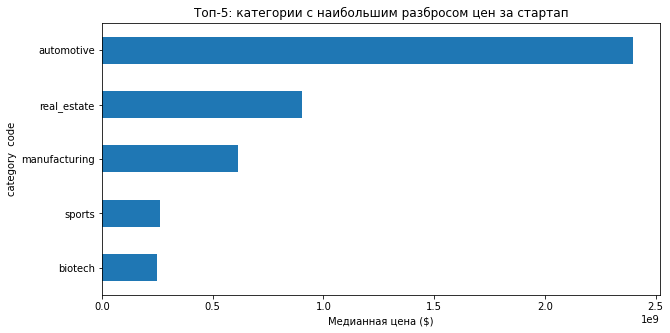

In [43]:
# График топ-5 по разбросу
plt.figure(figsize=(10,5))
top_iqr['iqr'].sort_values(ascending=True).plot(kind='barh')
plt.title('Топ-5: категории с наибольшим разбросом цен за стартап')
plt.xlabel('Медианная цена ($)')
plt.show()

Исследовательский анализ показал, что к стартапам с типично высокой медианной ценой относятся категории: `nanotech`, `manufacturing`, `real_estate`, `automative`, `biotech`. Наибольший разрбос цен за стартап имеют: `automotive`, `real_estate`, `manufacturing`, `sports`, `biotech`.
Топ составили из пяти по той причине, что у такого количества позиций в топе высокая наглядность, их легко сравнить и запомнить, а также достаточность - топ-5 охватывает основные тренды. В качестве метрик были выбраны медиана (не искажается редкими дорогими сделками) и межквартильный размах IQR - разброс между 25 и 75 процентилями.


### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [44]:
#проверим уникальные статусы и посчитаем, сколько компаний принадлежит каждому из них
status_count = df['status'].value_counts()

print("Распределение компаний по статусам:")
print(status_count)


Распределение компаний по статусам:
operating    28621
acquired      9537
closed        2092
ipo            640
Name: status, dtype: int64


In [45]:
#фильтруем компании с количеством раундов больше нуля
df1 = df[df['funding  rounds'] > 0]

#группируем по статусу и считаем среднее количество раундов
rounds_by_status = df1.groupby('status')['funding  rounds'].mean().sort_values(ascending=False)

print("\nСреднее количество раундов по статусам:")
print(rounds_by_status.round(1))


Среднее количество раундов по статусам:
status
ipo          2.5
acquired     1.9
operating    1.6
closed       1.4
Name: funding  rounds, dtype: float64


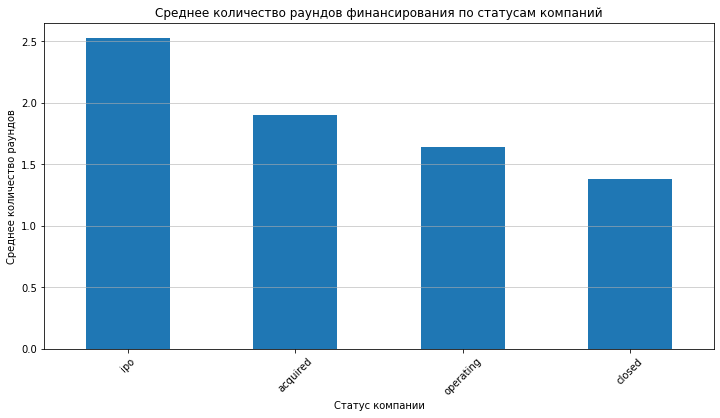

In [46]:
#задаём размер 
plt.figure(figsize=(12, 6))

# строим диаграмму среднего количества раундов
rounds_by_status.plot(kind='bar')
plt.title('Среднее количество раундов финансирования по статусам компаний')
plt.xlabel('Статус компании')
plt.ylabel('Среднее количество раундов')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.7)
plt.show()

Анализ показал, что публичные компании `IPO` имеют в среднем больше раундов (2.5), тогда как закрытые компании `closed` всех меньше - 1.4. Проданные компании `acquired` имеют значение 1.9 , а дейсвующие `operating` 1.6.

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №2__

Для начала нужно отфильтровать только компании, у которых больше 0 раундов, т.е те компании, которые в принципе проходили процедуру финансирования по раундам.
</div>

<div class="alert alert-info"> <b>Комментарии студента №2:</b> Добавил фильтрацию перед анализом и исправил выводы.</div>

<div class="alert alert-info"> <b>Комментарии студента №2:</b> Спасибо за проделанную работу, с тобой было комфортно работать и ты подсказал мне новые интересные вещи.</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №3__



Данила, это тебе спасибо за обратную связь и классный проект ^^ Очень рад, что понравился стиль ревью


## Шаг 4. Итоговый вывод и рекомендации

<a id='chapter4'></a>



В ходе проекта по исследованию стартапов мы подготавливали объединённый датасет и проверили, соответствуют ли данные в нём здравому смыслу.

Была произведена загрузка данных и их исследование. Ознакомление показало, что данные содержали информацию о 217 тыс. компаний с указанием их статуса. Также данные содержат информацию о финансировании, раундах финансирования, записи о покупках компаний, а также информацию о сотрудниках и их образовании. Было выявлено высокое количество пропусков, которые могли бы повлиять на размер выборки и снизить репрезентативность.

В результате предобработки были сделаны сдедующие выводы:

**- Раунды финансирования по годам:**
типичный размер собранных в рамках одного раунда средств был максимален в 2005 году и составлял 550000. В 2013 году количество раундов и размер средств увеличился в сравнении с 2012 годом и составлял 11072 и 120000 соответственно.

**- Люди и их образование:**
    - к стартапам (1-10 чел.) относятся 22692 компании, в которых без образования (данных об образовании) 37.6% сорудников;
    - к малым компаниям (11-50 чел.) относятся 216 компаний, в которых без образования (данных об образовании) 27.7% сорудников; 
    - к средним компаниям (51-200 чел.) относятся 12 компаний, в которых без образования (данных об образовании) 17.8% сорудников;
    - к большим компаниям (201+ чел.) относятся 2 компании, в которых без образования (данных об образовании) 19.4% сорудников.
    
**- Объединять или не объединять — вот в чём вопрос:**
Датафреймы имеют низкую заполненость в столбце network_username. Также наиболее вероятно, что они содержат данные разной природы - в company_and_rounds относящиеся к компании, а в people - к сотруднику. Низкое количетство общих элементов пересечения подверждает это. Использовать столбец network_username для объединения данных не рекомендуется.

**- Проблемный датасет и причина возникновения пропусков:**
Мы успешно разбили исходный датасет `company_and_rounds` на 2 разных: `companies` и `rounds`. После этого стало удобно отбирать компании по параметрам и рассчитать показатели из расчёта на одну компанию.

Во время исследовательского анализа данных мы отобрали компании по необходимым критериям и объединили нужные для анализа датафреймы. 

Анализ выбросов показал, что выборка имеет крайне высокие выбросы, сильно искажающие результаты. Для фильтрации типичной компании мы воспользовались межквартильным размахом IQR, после чего рассчитали, что выбивающимися значениями размера общего финансирования для одной компании являются значения **выше 14.1 млн**. Также стоит отметить, что 25% компаний имеют нулевое финансирование. После проведения фильтрации типичное среднее значение финансирования составляет **1.85** млн, а более корректное типичное медианное значение финансировния - **250 тыс.** Из 40890 компаний 5889 имеют размер финансирования выше 14.1 млн, что можно отнести к исключительным случаям.

После проведения аналитического анализа компаний, проданных за 0 или 1 доллар при ненулевом объёме финансирования можно отметить, что среди **1618** компаний, которые были проданы за ноль или за один доллар при ненулевом объёме финансирования, нижней границей выбросов является значение **0**, соответвующее **0 персентилю**, а верхней границей является знаячение **35 750 000**, соответсвующее **90.9 персентилю**.

Исследовательский анализ по категориям показал, что к стартапам с типично высокой медианной ценой относятся категории: `nanotech`, `manufacturing`, `real_estate`, `automative`, `biotech`. Наибольший разрбос цен за стартап имеют: `automotive`, `real_estate`, `manufacturing`, `sports`, `biotech`. Топ составили из пяти по той причине, что у такого количества позиций в топе высокая наглядность, их легко сравнить и запомнить, а также достаточность - топ-5 охватывает основные тренды. В качестве метрик были выбраны медиана (не искажается редкими дорогими сделками) и межквартильный размах IQR - разброс между 25 и 75 процентилями.

Анализ количества раундов показал, что публичные компании `IPO` имеют в среднем больше раундов (2.5), тогда как закрытые компании `closed` всех меньше - 1.4. Проданные компании `acquired` имеют значение 1.9 , а дейсвующие `operating` 1.6. Чем успешнее итоговый статус компании (IPO > acquired > operating > closed), тем больше раундов финансирования она обычно проходит. Это коррелирует с необходимостью масштабирования бизнеса для достижения высоких результатов.

В качестве рекомендации можно сделать вывод, что полученные результаты частично подкрепляют друг друга, но в некоторых местах противоречат логике и заставляют сомневаться в результатах. Так, 25% компаний с нулевым финансированием стоит изучить глубже или исключить из анализа, в топ-5 категорий с высокой ценой стоит изучить количество компаний в каждой категории, некоторые отрасли могут быть дорогими из-за единичных дорогих сделок.  

Инвесторам стоит сфокусироваться на высокомедианных категориях, таких как `biotech`, `nanitech`, `real_estate` и стоит быть осторожными с категорями, имеющими высокий разброс цен, как `automotive` и `manufacturing`. Также стоит изучить пик инвестиций 2005 года, исследовать, какие факторы к этому привели. Также стоит избегать стартапов с нулевым финансированием. 


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Итоговый вывод завершает твое исследование. Представлены основные результаты полученные в ходе анализа, но самое главное - даны рекомендации заказчику. Это важное качество для специалиста. Развивай его и дальше
</div>

<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-block alert-success">✔️
    

__Коментарий от ревьюера №3__


В остальном всё чудно😊. Твой проект так и просится на github =)   
    
Поздравляю с успешным завершением проекта 😊👍
И желаю успехов в новых работах 😊
    
---
    
От себя хочу порекомендовать тебе отличную книгу про язык Python. Она очень классная (можно купить как новую, так и на Авито попадается. Вот ссылка на pdf этой книги)
    
https://monster-book.com/avtomatizaciya-zadach-s-python
</div>